# Classification Tree on Implementation on Titanic Data

By: Laura Moses

---

## Definition

In decision anaylsis, a **decision tree** can be used to visually and explicitly represent decisions and decesion making. Decision trees can be used for **classification** or **regression**. In this notebook, we will be using a **classification tree** in order to predict the target variable `survived`, whether or not a passenger survived the Titanic crash. Decision trees uses a tree-like model of decisions to make predictions. Growing a tree involves deciding on which features to choose and what conditions to use for splitting, along with knowing when to stop as to not *overfit* the data, thus a trim process is needed.

---

The following packages will be needed to run this notebook: 

* `numpy` [documentation](https://numpy.org/doc/)
* `pandas` [documentation](https://pandas.pydata.org/docs/)
* `sklearn` [documentation](https://scikit-learn.org/stable/)

The following data is used in this notebook:
* Titanic [available here](https://data.world/nrippner/titanic-disaster-dataset#__sid=js0)

---

---

### Import Libraries and Modules

---

In [1]:
# Import libraries
import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

---

### Data Exploration and Preprocessing

---

In [2]:
# Read in data
titanic = pd.read_csv("titanic.csv")

In [3]:
# Check data types and non-null counts 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


---

We can see that there are quite a bit of floats and object types we will need to convert to integers or numeric types. 

---

In [4]:
# See if there are missing values 
titanic[:].isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

---

#### Missing Data

There appears to be a row of missing data, as well as 263 missing values for `age`, 1 value for `fare`, and 2 values for `embarked`. Because of the number of missing values, we will not be using `cabin`, `boat`, `body`, or `home.dest` data. In order keep the rest of the data, we will need to fill in missing data values. 

---

In [5]:
# Choose features subset and label
features = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
labels = titanic[['survived']]

---

#####  `age`

In order to take care of missing values, we can create an array of random numbers computed based on the mean age and standard deviations to fill null values.

---

In [6]:
# Fill missing values for age 
mean = features["age"].mean() # compute mean
std = features["age"].std() # compute std
is_null = features["age"].isnull().sum()
    
# Compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
# Fill NaN values in Age column with random values generated
age_slice = features["age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
features["age"] = age_slice

C:\Users\laura\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


---

#####  `fare`

We will assign `0` to the missing value of `fare`.

---

In [7]:
# Fill in missing values for fare
features['fare'] = features['fare'].fillna(0)

C:\Users\laura\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


---

#####  `embarked`

Because there are only two values missing, we will just fill these in with the most popular port. 

---

In [8]:
# Fill in missing values for embarked
features['embarked'].describe() # check most popular
top = 'S'
features['embarked'] = features['embarked'].fillna(top)

C:\Users\laura\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
# Now drop the one row of NA's in features
features = features[:].dropna()
features[:].isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [10]:
# Now drop the one row of NA's in labels
labels = labels.dropna()
labels.isnull().sum()

survived    0
dtype: int64

---

#### Convert Data Types

---

In [11]:
## Convert data types
# Convert pclass to int64
features['pclass'] = features['pclass'].astype(int)
    
# Convert sex to numeric 
genders = {"male": 0, "female": 1}
features['sex'] = features['sex'].map(genders)

# Convert age to float32
features['age'] = features['age'].astype(float)

# Convert sibsp to int64
features['sibsp'] = features['sibsp'].astype(int)

# Convert parch to int64
features['parch'] = features['parch'].astype(int)

# Convert fare to int64
features['fare'] = features['fare'].astype(int)

# Convert embarked to numeric
ports = {"S": 0, "C": 1, "Q": 2}
features['embarked'] = features['embarked'].map(ports)

# Convert survived to int64
labels['survived'] = labels['survived'].astype(int)

In [12]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int32  
 1   sex       1309 non-null   int64  
 2   age       1309 non-null   float64
 3   sibsp     1309 non-null   int32  
 4   parch     1309 non-null   int32  
 5   fare      1309 non-null   int32  
 6   embarked  1309 non-null   int64  
dtypes: float64(1), int32(4), int64(2)
memory usage: 61.4 KB


In [13]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   survived  1309 non-null   int32
dtypes: int32(1)
memory usage: 15.3 KB


---

#### Catagorizing Data

##### `age`: 

First it will need to be converted from float to int, then we will override the `age` feature with an age grouping instead. Then we will check the distribution to make sure no majority of the data falls into a single group. 

---

In [14]:
# Age grouping
features['age'] = features['age'].astype(int)
features.loc[ features['age'] <= 11, 'age'] = 0
features.loc[(features['age'] > 11) & (features['age'] <= 18), 'age'] = 1
features.loc[(features['age'] > 18) & (features['age'] <= 22), 'age'] = 2
features.loc[(features['age'] > 22) & (features['age'] <= 27), 'age'] = 3
features.loc[(features['age'] > 27) & (features['age'] <= 33), 'age'] = 4
features.loc[(features['age'] > 33) & (features['age'] <= 40), 'age'] = 5
features.loc[(features['age'] > 40) & (features['age'] <= 66), 'age'] = 6
features.loc[ features['age'] > 66, 'age'] = 6

# let's see how it's distributed
features['age'].value_counts()

6    248
4    238
3    219
5    195
2    184
1    134
0     91
Name: age, dtype: int64

---

### Build the Model

---

In [16]:
x_train, x_test, y_train, y_test = train_test_split(features, labels)

In [17]:
# Create a decision tree with max 4 regions
tree_clf = DecisionTreeClassifier(max_depth=4)

# Train it using fit method
tree_clf.fit(x_train, y_train)

# Prediction
y_pred = pd.DataFrame(tree_clf.predict(x_test))
accuracy = accuracy_score(y_test, y_pred)
print("The decision tree predicted the survivors in the test set with ", round(accuracy*100,2), "% accuracy", sep="")

The decision tree predicted the survivors in the test set with 81.1% accuracy


[Text(167.4, 195.696, 'X[1] <= 0.5\ngini = 0.474\nsamples = 981\nvalue = [602, 379]'),
 Text(83.7, 152.208, 'X[0] <= 1.5\ngini = 0.317\nsamples = 638\nvalue = [512, 126]'),
 Text(41.85, 108.72, 'X[2] <= 5.5\ngini = 0.459\nsamples = 137\nvalue = [88, 49]'),
 Text(20.925, 65.232, 'X[5] <= 134.5\ngini = 0.495\nsamples = 73\nvalue = [40, 33]'),
 Text(10.4625, 21.744, 'gini = 0.5\nsamples = 62\nvalue = [31, 31]'),
 Text(31.387500000000003, 21.744, 'gini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(62.775000000000006, 65.232, 'X[5] <= 31.5\ngini = 0.375\nsamples = 64\nvalue = [48, 16]'),
 Text(52.3125, 21.744, 'gini = 0.483\nsamples = 22\nvalue = [13, 9]'),
 Text(73.2375, 21.744, 'gini = 0.278\nsamples = 42\nvalue = [35, 7]'),
 Text(125.55000000000001, 108.72, 'X[2] <= 0.5\ngini = 0.26\nsamples = 501\nvalue = [424, 77]'),
 Text(104.625, 65.232, 'X[0] <= 2.5\ngini = 0.492\nsamples = 32\nvalue = [18, 14]'),
 Text(94.16250000000001, 21.744, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(11

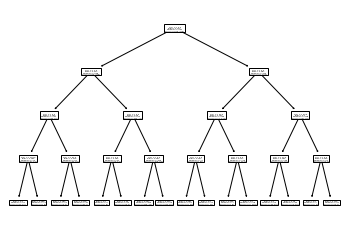

In [18]:
# Visualize tree above
tree.plot_tree(tree_clf)

---

### Removing features

Overfitting and having too many features can lead to issues in prediction accuracy for decision trees. So let's try removing `parch` as a feature, and seeing how it affects the accuracy. 

---

In [19]:
# Let's try removing parch
x_train2 = x_train.drop(['parch'], axis=1)
x_test2 = x_test.drop(['parch'], axis=1)

In [20]:
# Decision tree 
tree_clf = DecisionTreeClassifier(max_depth=4)

# Train it using fit method
tree_clf.fit(x_train2, y_train)

# Prediction
y_pred2 = pd.DataFrame(tree_clf.predict(x_test2))
accuracy = accuracy_score(y_test, y_pred2)
print("The decision tree predicted the survivors in the test set with ", round(accuracy*100,2), "% accuracy", sep="")

The decision tree predicted the survivors in the test set with 81.4% accuracy


---

### Conclusion

Removing `parch` from the features and setting the `max_depth` to $4$ provides a $81.4\%$ accuracy in correctly predicting Titanic survivors, which is a *slight* improvement over leaving it in. 

---